In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
car_data = pd.read_csv('Car_Price_Dataset.csv')

In [5]:
car_data.head()

,Unnamed: 0,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,city mpg,Popularity,MSRP
0,479,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
1,480,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
2,481,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
3,482,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,483,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725


In [6]:
car_data.shape

(2112, 11)

In [7]:
car_data.columns

Index(['Unnamed: 0', 'Make', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2112 non-null   int64  
 1   Make               2112 non-null   object 
 2   Engine Fuel Type   2112 non-null   object 
 3   Engine HP          2097 non-null   float64
 4   Engine Cylinders   2107 non-null   float64
 5   Transmission Type  2112 non-null   object 
 6   Driven_Wheels      2112 non-null   object 
 7   Vehicle Size       2112 non-null   object 
 8   city mpg           2112 non-null   int64  
 9   Popularity         2112 non-null   int64  
 10  MSRP               2112 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 181.6+ KB


#Dropping Unecessary Columns

In [16]:
car_data = car_data.drop(['Unnamed: 0'],axis=1)

#Renaiming Columns

In [18]:
car_data1 = car_data.rename(columns = {'Engine Fuel Type':'Fuel_Type','Engine HP':'Power_HP','Engine Cylinders':'No_of_Cylinders','Transmission Type':'Transmission','Vehicle Size':'vehicle_size','city mpg':'Mileage_mpg'})

In [20]:
car_data1.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [22]:
car_data1[car_data1.duplicated(subset =['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'vehicle_size', 'Mileage_mpg', 'Popularity'], keep = 'first')]

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,vehicle_size,Mileage_mpg,Popularity,MSRP
1,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
3,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725
5,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,43400
6,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,32820
...,...,...,...,...,...,...,...,...,...,...
2107,Toyota,regular unleaded,106.0,4.0,MANUAL,front wheel drive,Compact,30,2031,15250
2108,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,16375
2109,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,17285
2110,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,18000


In [26]:
car_data2=car_data1.drop_duplicates(subset =['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'vehicle_size', 'Mileage_mpg', 'Popularity'], keep = 'first')

In [27]:
car_data2.shape

(406, 10)

In [28]:
car_data2.isnull().sum()

Make               0
Fuel_Type          0
Power_HP           5
No_of_Cylinders    2
Transmission       0
Driven_Wheels      0
vehicle_size       0
Mileage_mpg        0
Popularity         0
MSRP               0
dtype: int64

In [30]:
power_mean = car_data2['Power_HP'].mean()
power_mean

214.00498753117208

In [32]:
cylinder_mode = car_data2['No_of_Cylinders'].mode()
cylinder_mode[0]

4.0

In [33]:
car_data2['Power_HP'] = car_data2['Power_HP'].fillna(power_mean)
car_data2['No_of_Cylinders'] = car_data2['No_of_Cylinders'].fillna(cylinder_mode[0])

C:\Users\ARYAN SHRIVASTAV\AppData\Local\Temp\ipykernel_16772\2827647396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data2['Power_HP'] = car_data2['Power_HP'].fillna(power_mean)
C:\Users\ARYAN SHRIVASTAV\AppData\Local\Temp\ipykernel_16772\2827647396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data2['No_of_Cylinders'] = car_data2['No_of_Cylinders'].fillna(cylinder_mode[0])


In [34]:
car_data2.isnull().sum()

Make               0
Fuel_Type          0
Power_HP           0
No_of_Cylinders    0
Transmission       0
Driven_Wheels      0
vehicle_size       0
Mileage_mpg        0
Popularity         0
MSRP               0
dtype: int64

#EDA(Exploratory Data Analysis)

In [35]:
car_data2.describe()

,Power_HP,No_of_Cylinders,Mileage_mpg,Popularity,MSRP
count,406.000000,406.000000,406.000000,406.000000,406.000000
mean,214.004988,5.295567,20.928571,3377.679803,25534.371921
std,84.009523,1.548023,10.734843,2121.244431,17135.324044
min,63.000000,0.000000,11.000000,873.000000,2000.000000
25%,154.250000,4.000000,15.000000,873.000000,18148.750000
50%,200.000000,5.000000,19.000000,2031.000000,25895.000000
75%,266.000000,6.000000,23.000000,5657.000000,32250.000000
max,662.000000,12.000000,126.000000,5657.000000,149995.000000


In [36]:
car_data2.Make.value_counts()

Make
Ford          184
Toyota        118
Volkswagen    104
Name: count, dtype: int64

<Axes: xlabel='Make'>

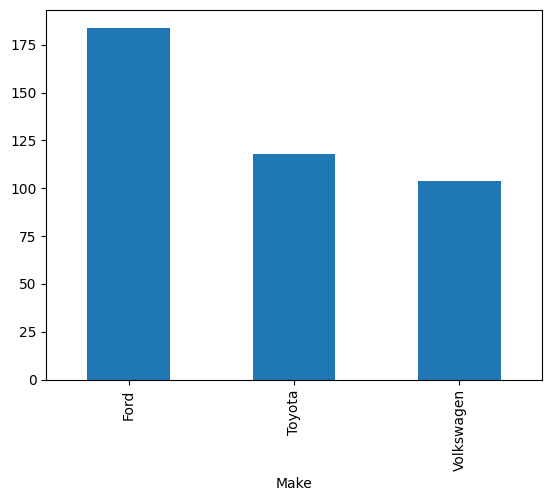

In [37]:
car_data2.Make.value_counts().plot(kind = 'bar')

In [39]:
car_data2.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP'],
      dtype='object')

<Axes: xlabel='Fuel_Type'>

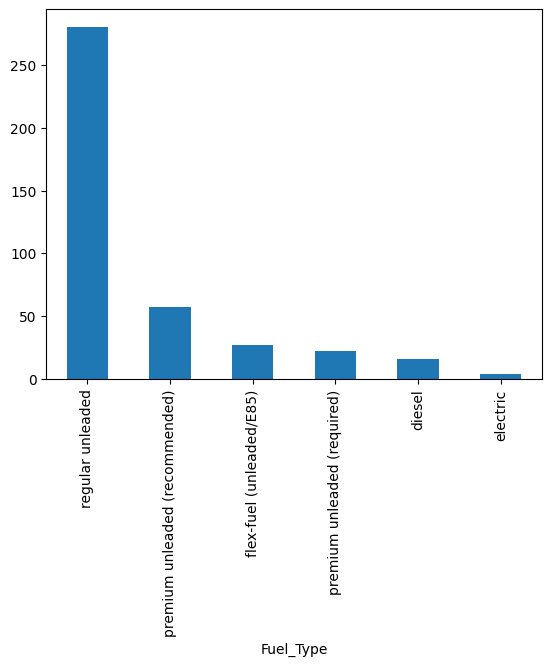

In [40]:
car_data2.Fuel_Type.value_counts().plot(kind = 'bar')

In [41]:
car_data2.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,vehicle_size,Mileage_mpg,Popularity,MSRP
0,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
2,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
26,Toyota,premium unleaded (recommended),205.0,4.0,MANUAL,rear wheel drive,Compact,21,2031,26255
27,Toyota,premium unleaded (recommended),200.0,4.0,AUTOMATIC,rear wheel drive,Compact,24,2031,26975
28,Ford,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,Midsize,16,5657,2000


<Axes: xlabel='vehicle_size'>

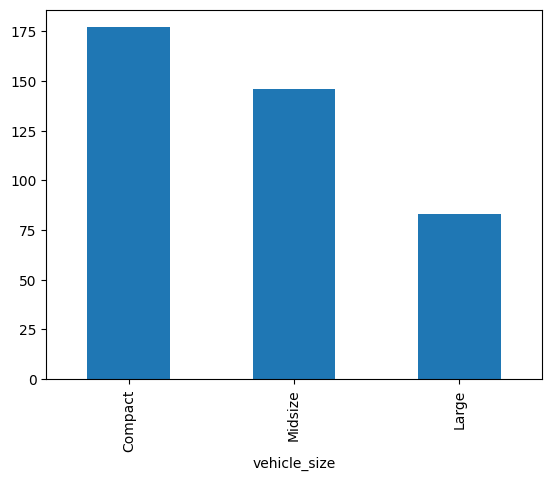

In [42]:
car_data2.vehicle_size.value_counts().plot(kind = 'bar')

<Axes: xlabel='Transmission'>

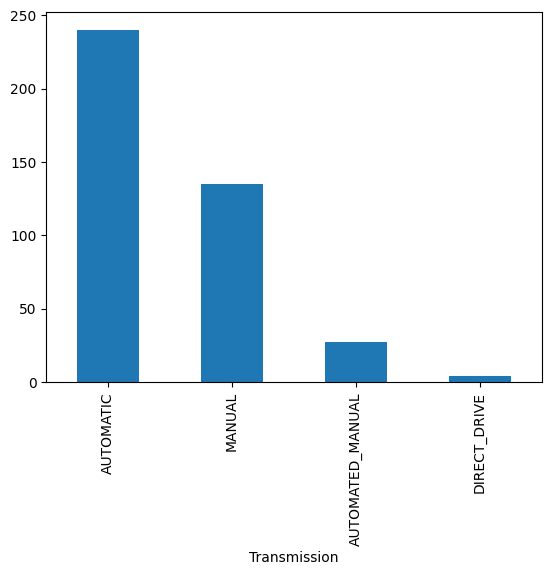

In [44]:
car_data2.Transmission.value_counts().plot(kind = 'bar')

<Axes: xlabel='Driven_Wheels'>

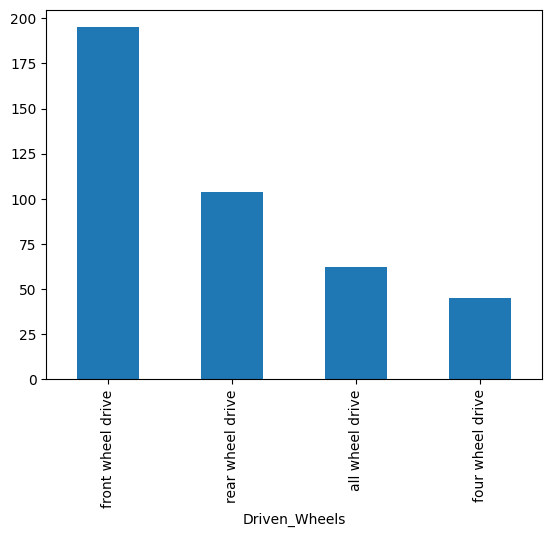

In [46]:
car_data2.	Driven_Wheels.value_counts().plot(kind = 'bar')

<Axes: ylabel='Frequency'>

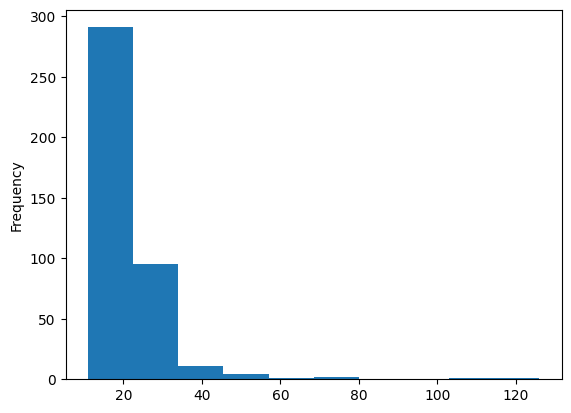

In [47]:
car_data2['Mileage_mpg'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

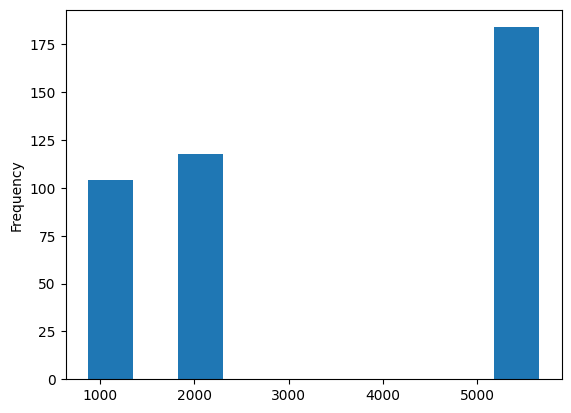

In [48]:
car_data2['Popularity'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

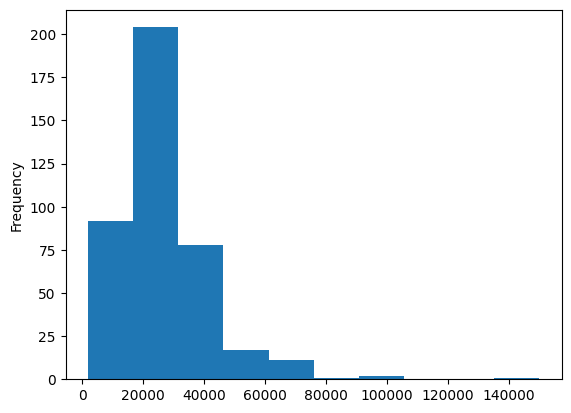

In [49]:
car_data2['MSRP'].plot(kind = 'hist')

#Machine Learning

To start with ML , First we need to pre process the data , i.e, Converting all the categorical columns into numeric which is also known as encoding columns

In [51]:
car_data2.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [57]:
car_data2['Make'] = Le.fit_transform(car_data2['Make'])
car_data2['Fuel_Type'] = Le.fit_transform(car_data2['Fuel_Type'])
car_data2['Transmission'] = Le.fit_transform(car_data2['Transmission'])
car_data2['Driven_Wheels'] = Le.fit_transform(car_data2['Driven_Wheels'])
car_data2['vehicle_size'] = Le.fit_transform(car_data2['vehicle_size'])

C:\Users\ARYAN SHRIVASTAV\AppData\Local\Temp\ipykernel_16772\2072572436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data2['Make'] = Le.fit_transform(car_data2['Make'])
C:\Users\ARYAN SHRIVASTAV\AppData\Local\Temp\ipykernel_16772\2072572436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data2['Fuel_Type'] = Le.fit_transform(car_data2['Fuel_Type'])
C:\Users\ARYAN SHRIVASTAV\AppData\Local\Temp\ipykernel_16772\2072572436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [58]:
car_data2.head(10)

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,vehicle_size,Mileage_mpg,Popularity,MSRP
0,1,5,270.0,6.0,1,3,2,17,2031,41365
2,1,5,270.0,6.0,1,1,2,17,2031,37615
26,1,3,205.0,4.0,3,3,0,21,2031,26255
27,1,3,200.0,4.0,1,3,0,24,2031,26975
28,0,5,135.0,6.0,1,3,2,16,5657,2000
29,0,5,135.0,6.0,1,3,2,15,5657,2000
30,0,5,155.0,6.0,1,0,1,14,5657,2000
31,0,5,135.0,6.0,1,3,1,15,5657,2000
32,0,5,140.0,6.0,1,3,2,15,5657,2000
33,0,5,155.0,6.0,1,0,1,13,5657,2000


@Now declaring dependent and independent variables
Here I am making pricre of the car as independent variable whereas all others column as dependent variable

In [59]:
x = car_data2.drop(['MSRP'], axis = 1)
y = car_data2['MSRP']

In [60]:
x.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,vehicle_size,Mileage_mpg,Popularity
0,1,5,270.0,6.0,1,3,2,17,2031
2,1,5,270.0,6.0,1,1,2,17,2031
26,1,3,205.0,4.0,3,3,0,21,2031
27,1,3,200.0,4.0,1,3,0,24,2031
28,0,5,135.0,6.0,1,3,2,16,5657


In [61]:
y.head()

0     41365
2     37615
26    26255
27    26975
28     2000
Name: MSRP, dtype: int64

#scaling of data to reduce error

In [65]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

In [67]:
x['Power_HP'] = std_scale.fit_transform(x[['Power_HP']])
x['No_of_Cylinders'] = std_scale.fit_transform(x[['No_of_Cylinders']])
x['Mileage_mpg'] = std_scale.fit_transform(x[['Mileage_mpg']])
x['Popularity'] = std_scale.fit_transform(x[['Popularity']])

In [70]:
x.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,vehicle_size,Mileage_mpg,Popularity
0,1,5,0.667354,0.455615,1,3,2,-0.366416,-0.635637
2,1,5,0.667354,0.455615,1,1,2,-0.366416,-0.635637
26,1,3,-0.107322,-0.837949,3,3,0,0.006662,-0.635637
27,1,3,-0.166913,-0.837949,1,3,0,0.286471,-0.635637
28,0,5,-0.941589,0.455615,1,3,2,-0.459686,1.075846


Splitting Data into Training and Testing

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#Model Devlopment

In [71]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()

In [72]:
LinearReg.fit(x_train,y_train)

LinearRegression()

Model Prediction

In [73]:
y_pred = LinearReg.predict(x_test)
y_pred

array([20318.22115552, 16582.74275644, 14264.29171771,  4566.73778141,
       25924.37284195, 16607.86318182, 17925.64362049, 22925.94620764,
       41754.05070416, 32831.02692986, 47426.06452448, 19726.38336778,
       36815.48519603, 18444.96609235, 23734.48813563, 42343.49425748,
        5628.12925969, 42599.77771256,  8864.7144217 , 18605.63284055,
       18653.79556952, 38817.44440278,  6772.6306786 , 35899.26141632,
       18825.41137965, 20086.15677762, 13186.22131248, 12478.50792244,
       24334.50177396, 16959.40848736, 30432.31744113,  5209.21301955,
       30466.93937893, 29836.9605869 , 17425.39071649, 19793.72161969,
        3130.26100366, 15157.18095963, 13846.98665799, 63553.76557005,
       37663.94795119, 30176.03398605, 15896.52922864, 17669.44330929,
       15177.13349774, 37125.10375452, 48767.3548737 , 35514.88770813,
       40153.13486478, 30070.59091214, 18181.92707558, 10607.13014091,
       17342.60077242, 11801.03739277, 42401.54295077, 42939.83814334,
      

#Model Evaluation

In [74]:
from sklearn.metrics import r2_score,mean_squared_error

In [75]:
r2_score(y_test,y_pred)

0.7252807814852267

In [76]:
mse = mean_squared_error(y_test,y_pred)
mse

70185499.56097955

In [78]:
RMSE = (mse)**0.5
RMSE

8377.678649899359